In [158]:
print('test')

test


#### Performa siswa dengan melihat nilai akhir (G3) sebagai acuan/label

##### Import Libraries 

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os

##### Fetch File  

In [160]:
import urllib.request # mendownload data dari url

DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/static/public/320/'
STUDENT_PATH = os.path.join('datasets', 'student_performance')
STUDENT_URL = DOWNLOAD_ROOT + 'student+performance.zip'

def fetch_student_performance_data(student_url=STUDENT_URL, student_path=STUDENT_PATH):
    if not os.path.isdir(student_path):
        os.makedirs(student_path)
    zip_path = os.path.join(student_path, 'student_performance.zip')
    urllib.request.urlretrieve(student_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        f.extractall(path=student_path)
        print(f.namelist())
    

In [161]:
fetch_student_performance_data()

['.student.zip_old', 'student.zip']


##### Load Student File

In [162]:
def load_student_performance_data(student_path=STUDENT_PATH):
    # extract student.zip
    with zipfile.ZipFile(os.path.join(student_path, 'student.zip')) as f:
        if not os.path.isdir(student_path+'/student'):
            os.makedirs(student_path+'/student')
        f.extractall(student_path+'/student')
    # load data
    student_csv = os.path.join(student_path, 'student/student-mat.csv')
    return pd.read_csv(student_csv, sep=';')

In [163]:
student = load_student_performance_data()
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##### Data Explatory

In [164]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [165]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


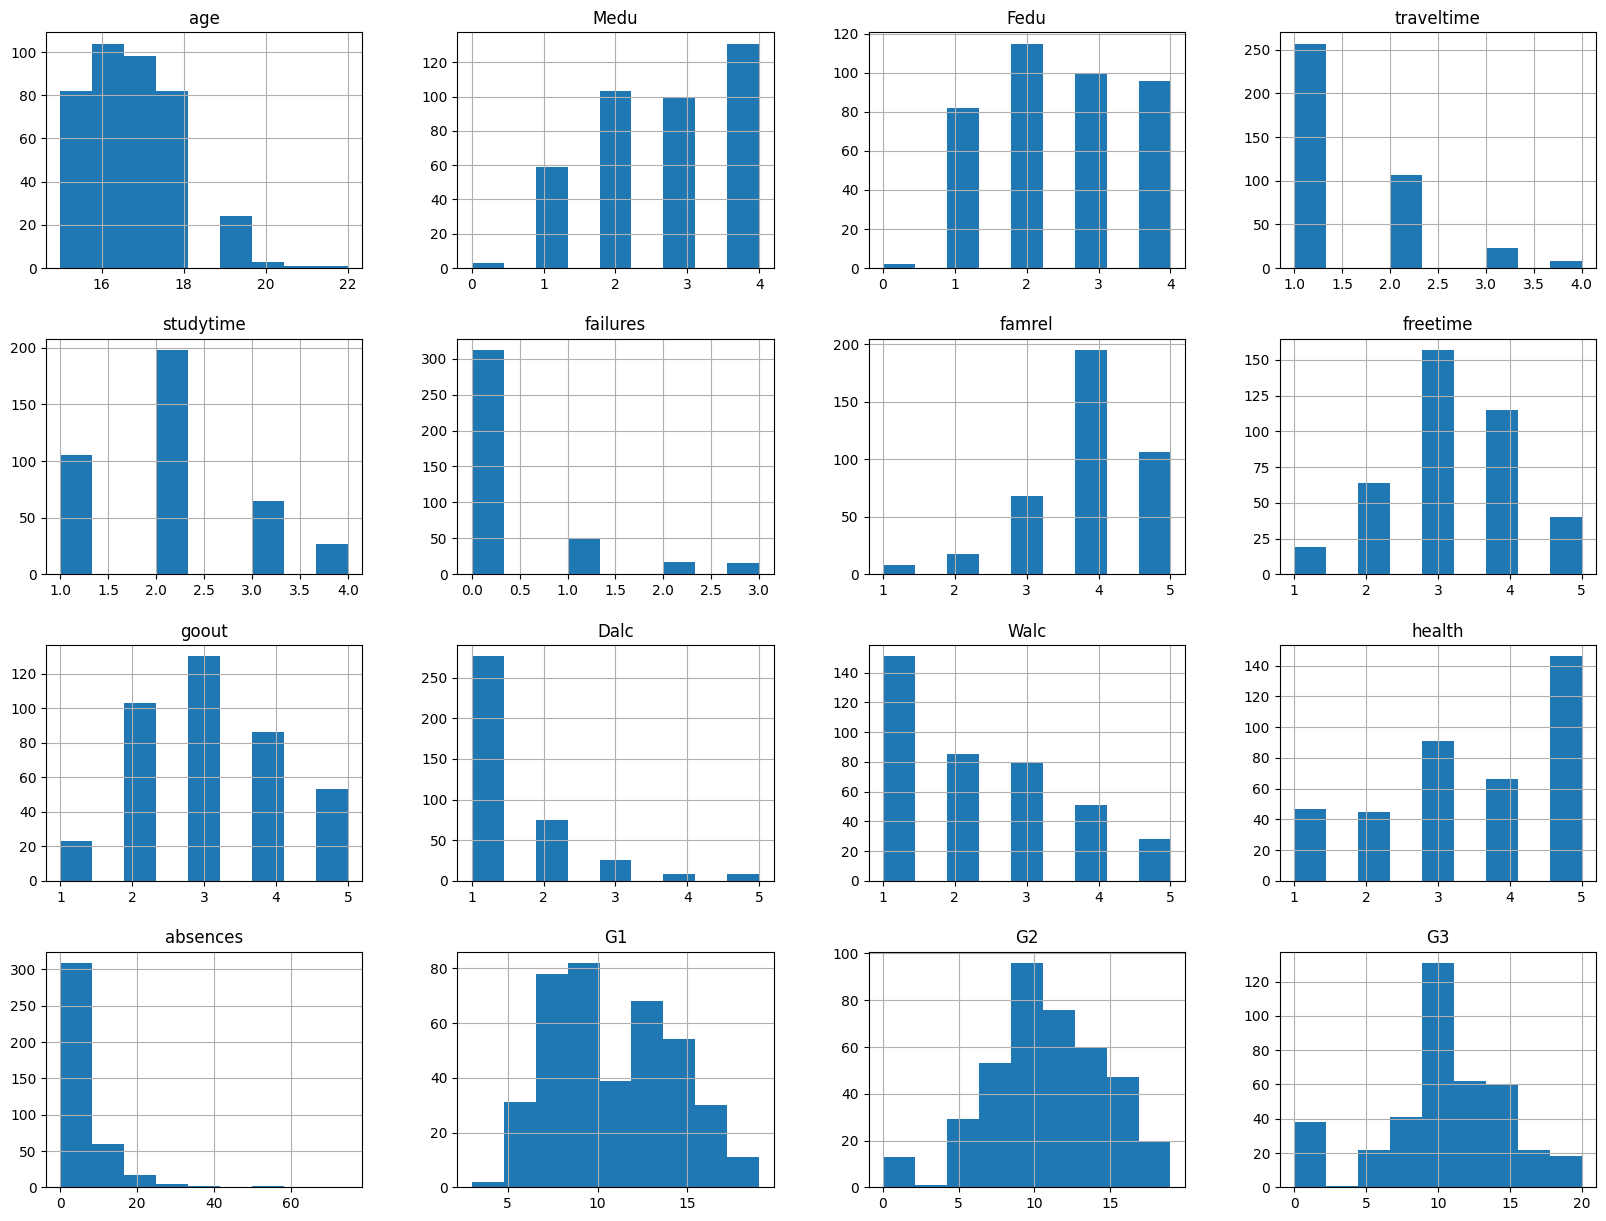

In [166]:
n_bins = int(np.log2(len(student)) + 1) # Sturges' formula -> untuk menentukan jumlah bins
student.hist(bins=n_bins, figsize=(20,15))
plt.show()

In [167]:
# drop G1 and G2
student = student.drop(['G1', 'G2'], axis=1)

##### hanya menggunakan data age < 20


In [168]:
student = student.query('age < 20')
student["age"].value_counts()

age
16    104
17     98
18     82
15     82
19     24
Name: count, dtype: int64

In [169]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(student, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((312, 31), (78, 31))

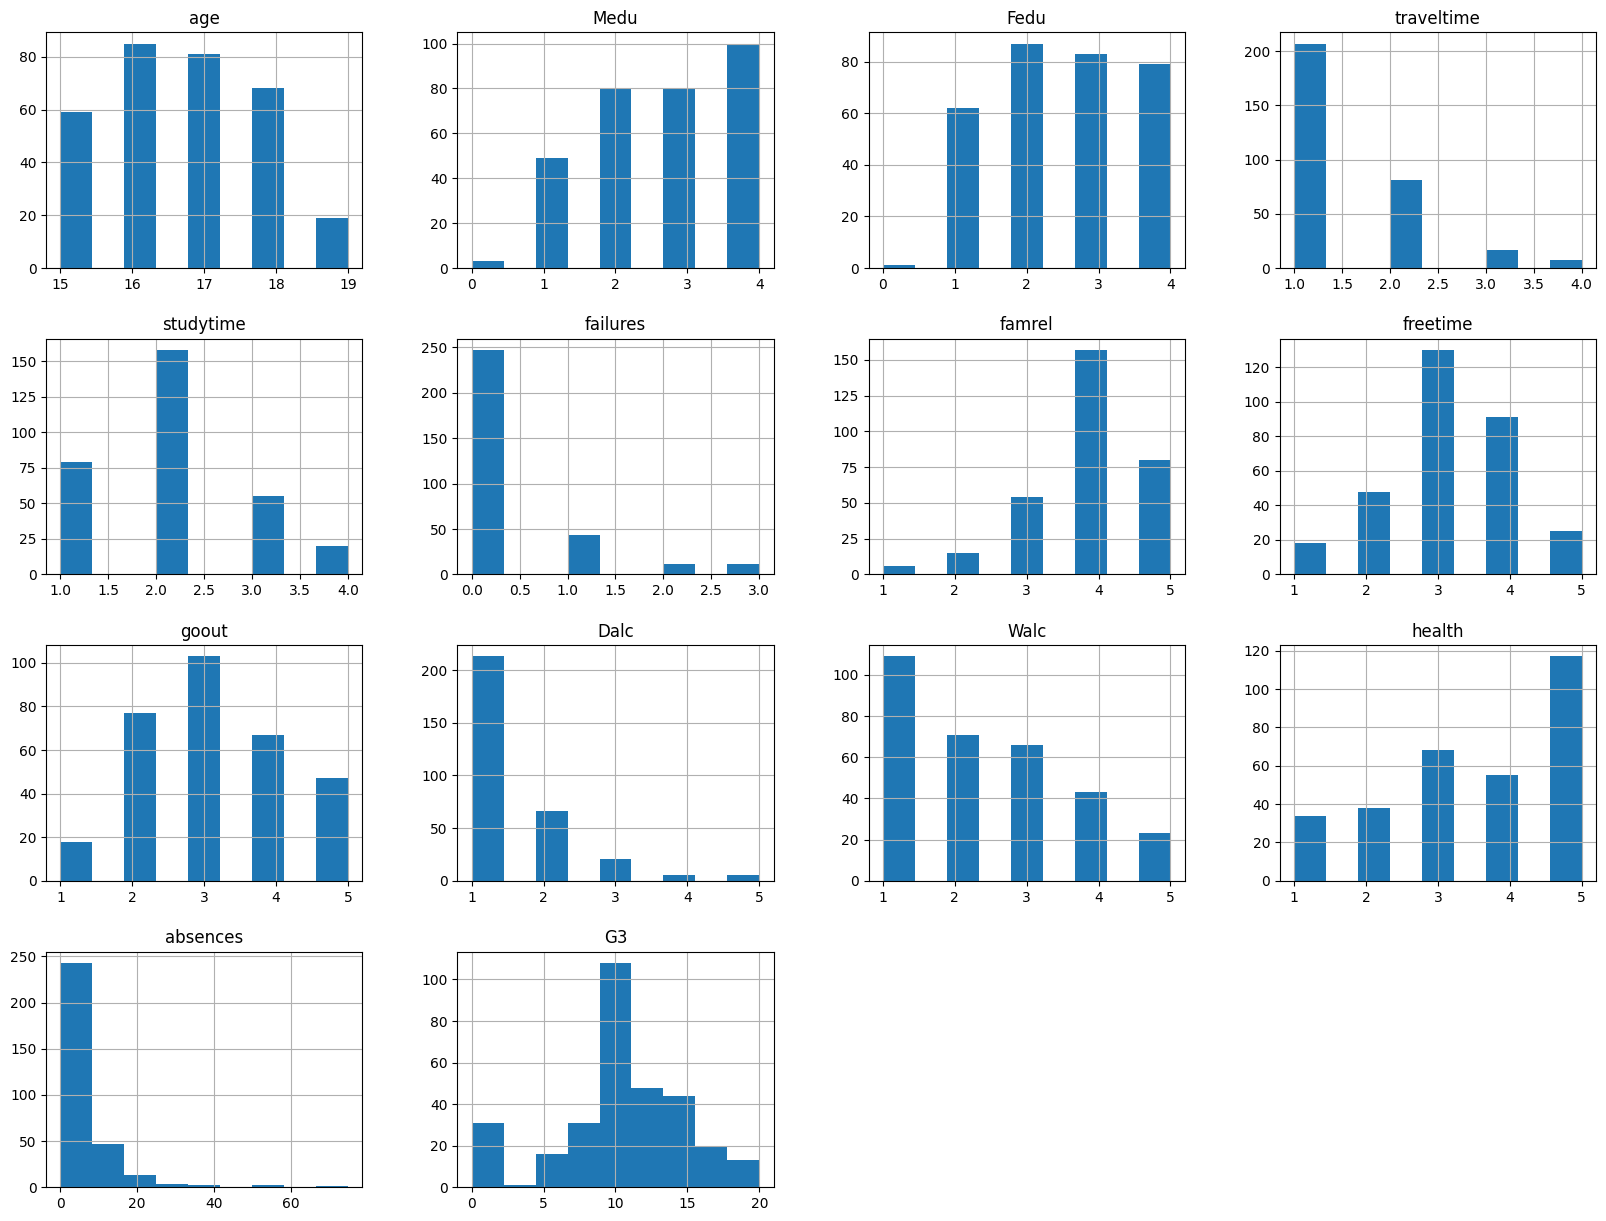

In [170]:
train_set.hist(bins=n_bins, figsize=(20,15))
plt.show()

In [171]:
student_num = train_set.copy()
for column in student.columns:
    student_num.drop(column, axis=1, inplace=True) if student_num[column].dtype == 'object' else student_num
student_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
292,18,2,1,1,2,1,5,4,3,1,1,5,12,13
63,16,4,3,1,3,0,3,4,4,2,4,4,2,9
239,18,2,2,1,2,1,5,5,4,3,5,2,0,0
355,18,3,3,1,2,0,5,3,4,1,1,5,0,9
219,17,2,2,1,3,0,4,3,3,1,1,4,4,10


In [172]:
corr_matrix = student_num.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
Medu          0.212242
Fedu          0.138101
studytime     0.111595
famrel        0.049733
absences      0.038009
freetime      0.004005
Walc         -0.041932
Dalc         -0.046813
health       -0.060809
goout        -0.096691
traveltime   -0.115866
age          -0.167889
failures     -0.372283
Name: G3, dtype: float64

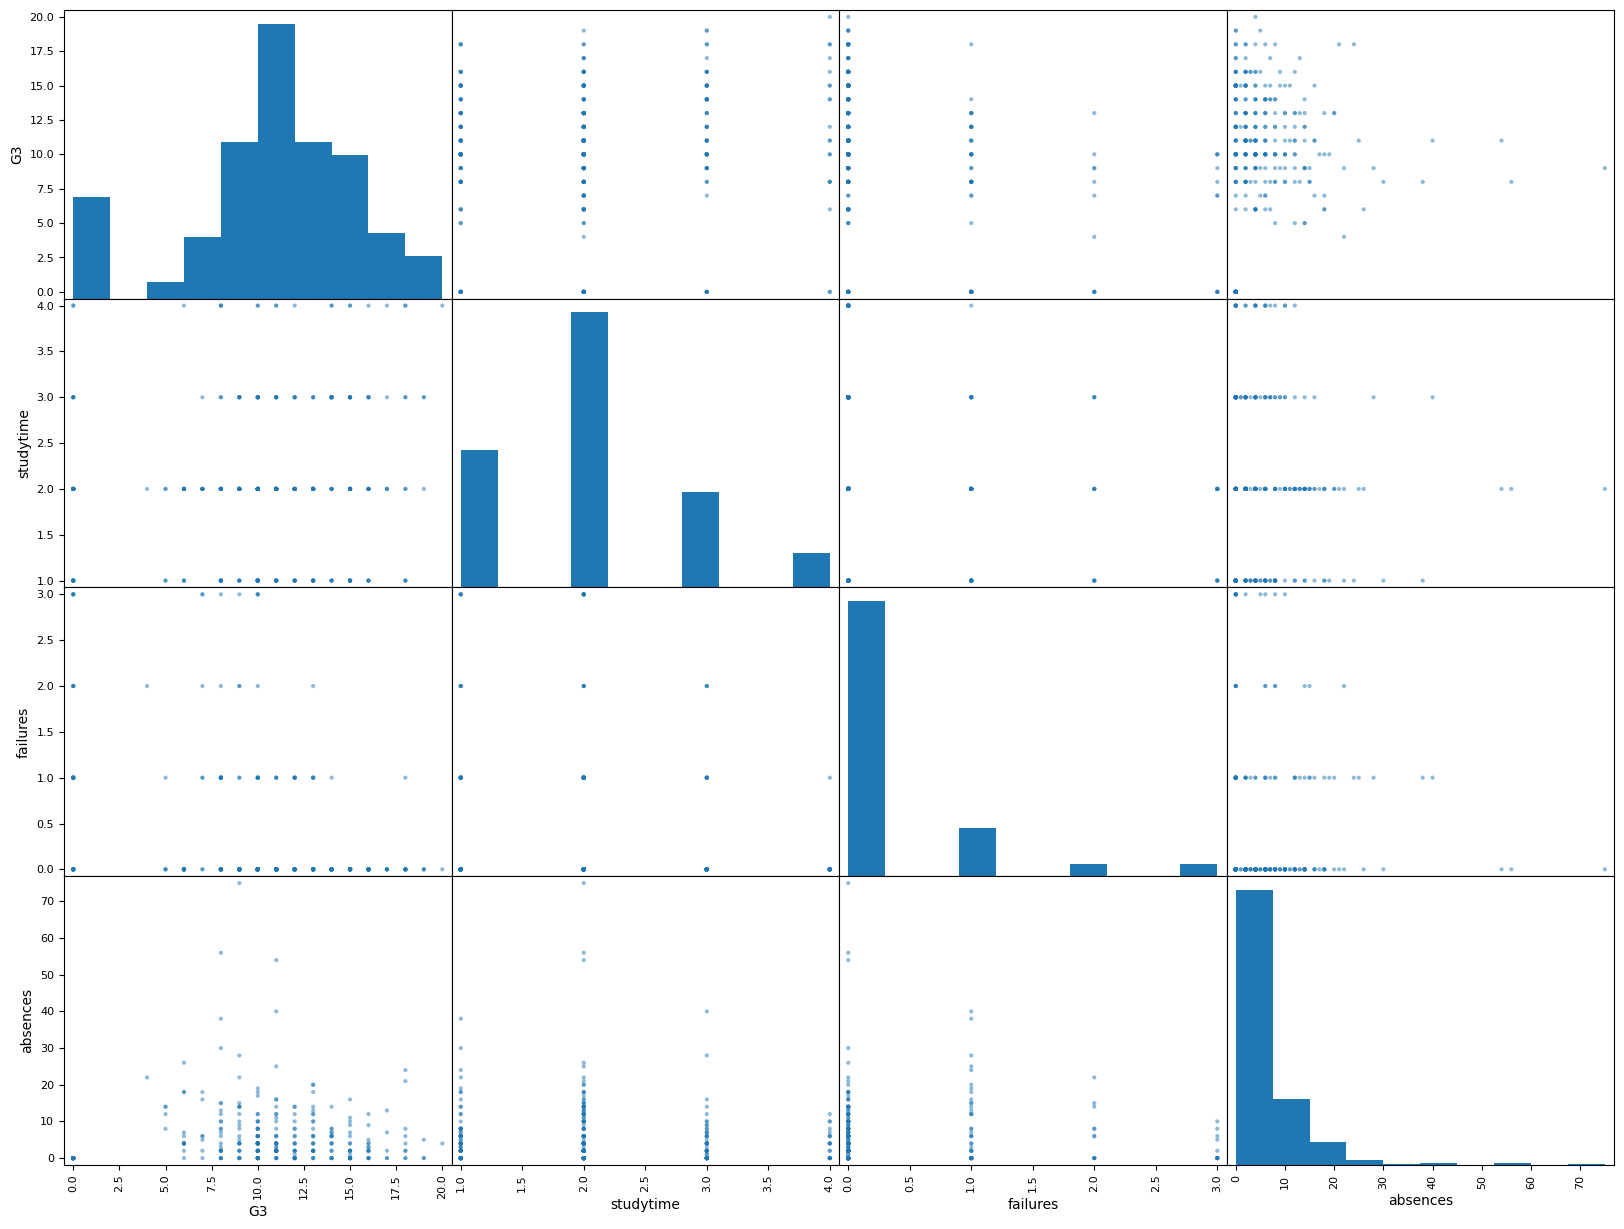

In [173]:
from pandas.plotting import scatter_matrix

attributes = ['G3', 'studytime', 'failures', 'absences']

scatter_matrix(student_num[attributes], figsize=(20,15))
plt.show()

##### Split predictors and labels   

In [174]:
student_num_predictors = student_num.drop('G3', axis=1)
student_num_labels = student_num['G3']

#### Data Transformation

##### Handling Missing Values

In [175]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(student_num_predictors)



SimpleImputer(strategy='median')

In [176]:
imputer.statistics_

array([17.,  3.,  3.,  1.,  2.,  0.,  4.,  3.,  3.,  1.,  2.,  4.,  4.])

In [177]:
imputer.transform(student_num_predictors)

array([[18.,  2.,  1., ...,  1.,  5., 12.],
       [16.,  4.,  3., ...,  4.,  4.,  2.],
       [18.,  2.,  2., ...,  5.,  2.,  0.],
       ...,
       [18.,  2.,  3., ...,  3.,  2.,  4.],
       [19.,  1.,  1., ...,  3.,  2.,  8.],
       [15.,  4.,  4., ...,  1.,  5.,  4.]], shape=(312, 13))

In [178]:
student_num_predictors_handled_missing_value = pd.DataFrame(imputer.transform(student_num_predictors), columns=student_num_predictors.columns)
student_num_predictors_handled_missing_value.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18.0,2.0,1.0,1.0,2.0,1.0,5.0,4.0,3.0,1.0,1.0,5.0,12.0
1,16.0,4.0,3.0,1.0,3.0,0.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0
2,18.0,2.0,2.0,1.0,2.0,1.0,5.0,5.0,4.0,3.0,5.0,2.0,0.0
3,18.0,3.0,3.0,1.0,2.0,0.0,5.0,3.0,4.0,1.0,1.0,5.0,0.0
4,17.0,2.0,2.0,1.0,3.0,0.0,4.0,3.0,3.0,1.0,1.0,4.0,4.0


In [179]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

student_num_predictors_tr = standardScaler.fit_transform(student_num_predictors_handled_missing_value) 
student_num_predictors_tr

array([[ 1.11040087, -0.65453732, -1.44987729, ..., -1.05899443,
         1.0281564 ,  0.72125261],
       [-0.58370706,  1.16071285,  0.40027287, ...,  1.27878573,
         0.30075323, -0.45507156],
       [ 1.11040087, -0.65453732, -0.52480221, ...,  2.05804578,
        -1.1540531 , -0.69033639],
       ...,
       [ 1.11040087, -0.65453732,  0.40027287, ...,  0.49952568,
        -1.1540531 , -0.21980673],
       [ 1.95745484, -1.5621624 , -1.44987729, ...,  0.49952568,
        -1.1540531 ,  0.25072294],
       [-1.43076103,  1.16071285,  1.32534795, ..., -1.05899443,
         1.0281564 , -0.21980673]], shape=(312, 13))

In [180]:
pd.DataFrame(student_num_predictors_tr, index=student_num_predictors_handled_missing_value.index, columns=student_num_predictors_handled_missing_value.columns)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.110401,-0.654537,-1.449877,-0.623041,-0.062040,0.972446,1.204497,0.832680,-0.136452,-0.562544,-1.058994,1.028156,0.721253
1,-0.583707,1.160713,0.400273,-0.623041,1.147735,-0.445326,-1.045821,0.832680,0.750485,0.607547,1.278786,0.300753,-0.455072
2,1.110401,-0.654537,-0.524802,-0.623041,-0.062040,0.972446,1.204497,1.851488,0.750485,1.777639,2.058046,-1.154053,-0.690336
3,1.110401,0.253088,0.400273,-0.623041,-0.062040,-0.445326,1.204497,-0.186128,0.750485,-0.562544,-1.058994,1.028156,-0.690336
4,0.263347,-0.654537,-0.524802,-0.623041,1.147735,-0.445326,0.079338,-0.186128,-0.136452,-0.562544,-1.058994,0.300753,-0.219807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-1.430761,1.160713,-0.524802,-0.623041,2.357510,-0.445326,-1.045821,-0.186128,-0.136452,-0.562544,-1.058994,-0.426650,-0.690336
308,-1.430761,-0.654537,-0.524802,-0.623041,2.357510,-0.445326,1.204497,-2.223745,-1.023388,-0.562544,-1.058994,-0.426650,0.250723
309,1.110401,-0.654537,0.400273,-0.623041,2.357510,-0.445326,0.079338,1.851488,1.637421,-0.562544,0.499526,-1.154053,-0.219807
310,1.957455,-1.562162,-1.449877,2.235617,-0.062040,3.807990,1.204497,0.832680,0.750485,1.777639,0.499526,-1.154053,0.250723


##### Handling Text and Categorical Attributes 

In [181]:
student_cat = train_set.copy()
student_cat = student_cat.drop(student_num.columns, axis=1)
student_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
292,GP,F,U,LE3,T,services,at_home,reputation,mother,no,no,no,no,yes,yes,yes,yes
63,GP,F,U,GT3,T,teacher,health,home,mother,yes,yes,yes,yes,yes,yes,yes,no
239,GP,M,U,GT3,T,other,services,reputation,father,no,no,no,no,yes,no,yes,no
355,MS,F,U,GT3,T,services,services,course,father,no,yes,no,no,yes,yes,no,yes
219,GP,F,U,GT3,T,at_home,at_home,course,mother,no,yes,yes,yes,yes,yes,yes,no


In [227]:
binary_cat  = student_cat[['school','sex','address','famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]
binary_cat.head()


,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
292,GP,F,U,LE3,T,no,no,no,no,yes,yes,yes,yes
63,GP,F,U,GT3,T,yes,yes,yes,yes,yes,yes,yes,no
239,GP,M,U,GT3,T,no,no,no,no,yes,no,yes,no
355,MS,F,U,GT3,T,no,yes,no,no,yes,yes,no,yes
219,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,no


In [236]:
from sklearn.base import BaseEstimator, TransformerMixin

class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if(type(X) is not np.array):
            X = np.array(X) 
        for i in range(len(X[0])): 
            classes = np.sort(np.unique(X[:, i]))
            if len(classes) != 2:
                raise ValueError('Features value must be a binary')
            first_class = classes[0]
            X[:, i] = np.where(X[:, i] == first_class, 0.0, 1.0)
        return X

##### Encode binary category column with Label Encoder

In [184]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

binary_cat_tr = binary_cat.copy()
for column in binary_cat.columns:
    binary_cat[column] = labelEncoder.fit_transform(binary_cat[column])
    
binary_cat_tr = np.array(binary_cat)
binary_cat_tr


/tmp/ipykernel_2741/1041008211.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_cat[column] = labelEncoder.fit_transform(binary_cat[column])
/tmp/ipykernel_2741/1041008211.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_cat[column] = labelEncoder.fit_transform(binary_cat[column])
/tmp/ipykernel_2741/1041008211.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

array([[0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0]], shape=(312, 13))

In [185]:
labelEncoder.classes_

array(['no', 'yes'], dtype=object)

##### Encode Binary Category with BinaryEncoder

In [224]:
student_cat[binary_cat.columns]

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
292,GP,F,U,LE3,T,no,no,no,no,yes,yes,yes,yes
63,GP,F,U,GT3,T,yes,yes,yes,yes,yes,yes,yes,no
239,GP,M,U,GT3,T,no,no,no,no,yes,no,yes,no
355,MS,F,U,GT3,T,no,yes,no,no,yes,yes,no,yes
219,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,U,GT3,T,no,no,no,no,yes,yes,yes,no
106,GP,F,U,GT3,T,yes,yes,yes,no,yes,yes,yes,no
271,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
350,MS,M,R,GT3,T,no,no,no,no,yes,yes,yes,no


In [225]:
student_cat

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
292,GP,F,U,LE3,T,services,at_home,reputation,mother,no,no,no,no,yes,yes,yes,yes
63,GP,F,U,GT3,T,teacher,health,home,mother,yes,yes,yes,yes,yes,yes,yes,no
239,GP,M,U,GT3,T,other,services,reputation,father,no,no,no,no,yes,no,yes,no
355,MS,F,U,GT3,T,services,services,course,father,no,yes,no,no,yes,yes,no,yes
219,GP,F,U,GT3,T,at_home,at_home,course,mother,no,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,GP,M,U,GT3,T,other,other,course,mother,no,no,no,no,yes,yes,yes,no
106,GP,F,U,GT3,T,other,other,course,mother,yes,yes,yes,no,yes,yes,yes,no
271,GP,F,U,GT3,T,other,services,reputation,father,no,yes,yes,yes,yes,yes,yes,yes
350,MS,M,R,GT3,T,other,services,home,other,no,no,no,no,yes,yes,yes,no


In [233]:
binaryEncoder = BinaryEncoder()

binary_cat_tr = binaryEncoder.fit_transform(student_cat[binary_cat.columns])
binary_cat_tr

array([[0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0]], shape=(312, 13), dtype=object)

In [187]:
non_binary_cat = student_cat.drop(binary_cat.columns, axis=1)
non_binary_cat.head()

,Mjob,Fjob,reason,guardian
292,services,at_home,reputation,mother
63,teacher,health,home,mother
239,other,services,reputation,father
355,services,services,course,father
219,at_home,at_home,course,mother


In [188]:
for column in non_binary_cat.columns:
    print(non_binary_cat[column].value_counts())

Mjob
other       105
services     83
at_home      52
teacher      43
health       29
Name: count, dtype: int64
Fjob
other       170
services     88
teacher      21
at_home      17
health       16
Name: count, dtype: int64
reason
course        114
reputation     87
home           81
other          30
Name: count, dtype: int64
guardian
mother    212
father     78
other      22
Name: count, dtype: int64


##### Custom Transformer to perform OneHotEncoding for all feature at once

In [209]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import chain

class MultiOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, feature_name_inisial_categories=False):
        """
        columns: 1d-array -> columns/features of dataframe
        feature_name_inisial_categories: boolean -> give inisial name of every transformed categories
        in case if there are a same categories or feature (if already transformed)
        
        """
        self.columns = columns
        self.oneHotEncoder = OneHotEncoder()
        self.categories_ = None
        self.feature_name_inisial_categories = feature_name_inisial_categories
        
        if self.columns is not None:
            self.dictOfOneHotEncoder = {column: [None, None] for column in self.columns}
        else:
            self.dictOfOneHotEncoder = {
                'Mjob': [None, None],
                'Fjob': [None, None], 
                'reason': [None, None],
                'guardian': [None, None]
            }
        
    def fit(self, X, y=None):
        for column in X.columns:
            self.oneHotEncoder.fit(X[[column]])
            if self.feature_name_inisial_categories is True:
                self.dictOfOneHotEncoder[column][0] = f'{column}_' + np.array(self.oneHotEncoder.categories_)
            else:
                self.dictOfOneHotEncoder[column][0] = np.array(self.oneHotEncoder.categories_)
            
        self.__unflattened_categories = [list(category[0][0]) for category in self.dictOfOneHotEncoder.values()]   
        self.categories_ = np.array(list(chain(*self.__unflattened_categories)))
        return self
    
    def transform(self, X): 
        for column in X.columns:
            self.dictOfOneHotEncoder[column][1] = self.oneHotEncoder.fit_transform(X[[column]])
        
        return np.concatenate([transformed[1].toarray() for transformed in self.dictOfOneHotEncoder.values()], axis=1)

        
    def fit_transform(self, X, y = None, **fit_params):
        return super().fit_transform(X, y, **fit_params)

# oneHotEncoder = OneHotEncoder()
# dictOfOneHotEncoder = {
#     'Mjob': [None, None],
#     'Fjob': [None, None], 
#     'reason': [None, None],
#     'guardian': [None, None]
# }
# for column in non_binary_cat.columns:
#     dictOfOneHotEncoder[column][1] = oneHotEncoder.fit_transform(non_binary_cat[[column]])
#     dictOfOneHotEncoder[column][0] = oneHotEncoder.categories_





##### Perform MultiOneHotEncoder for Non Binary Category

In [190]:
columns = non_binary_cat.columns

multiOneHotEncoder = MultiOneHotEncoder(columns=columns, feature_name_inisial_categories=True)
non_binary_cat_tr = multiOneHotEncoder.fit_transform(non_binary_cat)
multiOneHotEncoder.categories_

array(['Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'], dtype='<U17')

In [191]:
pd.DataFrame(non_binary_cat_tr, columns=multiOneHotEncoder.categories_, index=non_binary_cat.index)


,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
292,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
63,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
239,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
355,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
271,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [192]:
non_binary_cat_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(312, 17))

##### Concatenate both non binary and binary category as one

In [193]:
student_cat_tr =  np.concatenate([non_binary_cat_tr, binary_cat_tr], axis=1)
student_cat_tr

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]], shape=(312, 30))

##### Concatenate both numeric and category features as one

In [194]:
student_tr = np.concatenate([student_num_predictors_tr, student_cat_tr], axis=1)
student_cat_tr

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]], shape=(312, 30))

In [195]:
pd.DataFrame(student_tr)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.110401,-0.654537,-1.449877,-0.623041,-0.062040,0.972446,1.204497,0.832680,-0.136452,-0.562544,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,-0.583707,1.160713,0.400273,-0.623041,1.147735,-0.445326,-1.045821,0.832680,0.750485,0.607547,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.110401,-0.654537,-0.524802,-0.623041,-0.062040,0.972446,1.204497,1.851488,0.750485,1.777639,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.110401,0.253088,0.400273,-0.623041,-0.062040,-0.445326,1.204497,-0.186128,0.750485,-0.562544,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.263347,-0.654537,-0.524802,-0.623041,1.147735,-0.445326,0.079338,-0.186128,-0.136452,-0.562544,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-1.430761,1.160713,-0.524802,-0.623041,2.357510,-0.445326,-1.045821,-0.186128,-0.136452,-0.562544,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
308,-1.430761,-0.654537,-0.524802,-0.623041,2.357510,-0.445326,1.204497,-2.223745,-1.023388,-0.562544,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
309,1.110401,-0.654537,0.400273,-0.623041,2.357510,-0.445326,0.079338,1.851488,1.637421,-0.562544,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
310,1.957455,-1.562162,-1.449877,2.235617,-0.062040,3.807990,1.204497,0.832680,0.750485,1.777639,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


#### Defining and Construct Pipeline for simpler data preprocessing

##### Pipeline for Numeric Features

In [201]:
from sklearn.pipeline import Pipeline


pipeline_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardScaler', StandardScaler())
])

In [202]:
student_num_predictors_tr =  pipeline_num.fit_transform(student_num_predictors)
student_num_predictors_tr

array([[ 1.11040087, -0.65453732, -1.44987729, ..., -1.05899443,
         1.0281564 ,  0.72125261],
       [-0.58370706,  1.16071285,  0.40027287, ...,  1.27878573,
         0.30075323, -0.45507156],
       [ 1.11040087, -0.65453732, -0.52480221, ...,  2.05804578,
        -1.1540531 , -0.69033639],
       ...,
       [ 1.11040087, -0.65453732,  0.40027287, ...,  0.49952568,
        -1.1540531 , -0.21980673],
       [ 1.95745484, -1.5621624 , -1.44987729, ...,  0.49952568,
        -1.1540531 ,  0.25072294],
       [-1.43076103,  1.16071285,  1.32534795, ..., -1.05899443,
         1.0281564 , -0.21980673]], shape=(312, 13))

##### Pipeline for Categoric Features


In [239]:
from sklearn.compose import ColumnTransformer

binary_cat_features = binary_cat.columns
non_binary_cat_features = non_binary_cat.columns

pipeline_cat = ColumnTransformer([
    ('binary_cat', BinaryEncoder(), binary_cat_features),
    ('non_binary_cat', MultiOneHotEncoder(), non_binary_cat_features)
])

In [240]:
student_cat_tr = pipeline_cat.fit_transform(student_cat)
student_cat_tr

array([[0.0, 0.0, 1.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, ..., 0.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, ..., 1.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 0.0],
       [1.0, 1.0, 0.0, ..., 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, ..., 0.0, 1.0, 0.0]], shape=(312, 30), dtype=object)

##### Full Pipeline

In [244]:
full_pipeline = ColumnTransformer([
    ('num', pipeline_num, student_num.columns),
    ('cat', pipeline_cat, student_cat.columns)
])

In [249]:
train_set_tr = full_pipeline.fit_transform(train_set)
train_set_tr

array([[1.1104008740330136, -0.6545373188594251, -1.4498772903161303,
        ..., 0.0, 1.0, 0.0],
       [-0.5837070609220018, 1.160712845444047, 0.4002728715596676, ...,
        0.0, 1.0, 0.0],
       [1.1104008740330136, -0.6545373188594251, -0.5248022093782313,
        ..., 1.0, 0.0, 0.0],
       ...,
       [1.1104008740330136, -0.6545373188594251, 0.4002728715596676, ...,
        1.0, 0.0, 0.0],
       [1.957454841510521, -1.562162401011161, -1.4498772903161303, ...,
        0.0, 0.0, 1.0],
       [-1.4307610283995094, 1.160712845444047, 1.3253479524975667, ...,
        0.0, 1.0, 0.0]], shape=(312, 44), dtype=object)

In [250]:
pd.DataFrame(train_set_tr)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.110401,-0.654537,-1.449877,-0.623041,-0.06204,0.972446,1.204497,0.83268,-0.136452,-0.562544,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.583707,1.160713,0.400273,-0.623041,1.147735,-0.445326,-1.045821,0.83268,0.750485,0.607547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.110401,-0.654537,-0.524802,-0.623041,-0.06204,0.972446,1.204497,1.851488,0.750485,1.777639,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.110401,0.253088,0.400273,-0.623041,-0.06204,-0.445326,1.204497,-0.186128,0.750485,-0.562544,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.263347,-0.654537,-0.524802,-0.623041,1.147735,-0.445326,0.079338,-0.186128,-0.136452,-0.562544,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-1.430761,1.160713,-0.524802,-0.623041,2.35751,-0.445326,-1.045821,-0.186128,-0.136452,-0.562544,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
308,-1.430761,-0.654537,-0.524802,-0.623041,2.35751,-0.445326,1.204497,-2.223745,-1.023388,-0.562544,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
309,1.110401,-0.654537,0.400273,-0.623041,2.35751,-0.445326,0.079338,1.851488,1.637421,-0.562544,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
310,1.957455,-1.562162,-1.449877,2.235617,-0.06204,3.80799,1.204497,0.83268,0.750485,1.777639,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
